In [1]:
import sys
sys.path.append("..") 
from lrs2multi import LRS2Multi
from lrs2object import LRS2Object
import glob
import os.path as op
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table
from datetime import datetime, timedelta


def get_scifiles_from_folder(folders, object_name=None, exclude_folder=[], date=None, ndays=None,
                              collect_standards=False):
    filenames = []
    if date is not None:
        def_name = 'multi*%s*orange.fits' % date
    else:
        def_name = 'multi*orange.fits'
    if ndays is not None:
        def_name = 'multi*%s*orange.fits'
    for folder in folders:
        if ndays is not None:
            date_ = datetime(int(date[:4]), int(date[4:6]), int(date[6:]))
            datel = date_ - timedelta(days=int(ndays/2))
            for i in np.arange(ndays):
                ndate = datel + timedelta(days=i)
                daten = '%04d%02d%02d' % (ndate.year, ndate.month, ndate.day)
                all_names = sorted(glob.glob(op.join(folder, def_name % daten)))
                for filename in all_names:
                    filenames.append(filename)
        else:
            all_names = sorted(glob.glob(op.join(folder, def_name)))
            for filename in all_names:
                filenames.append(filename)
    smaller_list = []
    names = []
    for filename in filenames:
        f = fits.open(filename)
        name = f[0].header['OBJECT']
        names.append(name)
        try:
            slot = name.split('_')[-2]
        except:
            continue
        if '_'.join(op.basename(filename).split('_')[:4]) in exclude_folder:
            continue
        if collect_standards:
            if name.lower() in standard_names:
                if slot == '056':
                    smaller_list.append(filename.replace('orange', 'uv'))
                    smaller_list.append(filename.replace('orange', 'orange'))
                if slot == '066':
                    smaller_list.append(filename.replace('orange', 'red'))
                    smaller_list.append(filename.replace('orange', 'farred'))
            continue
        if (object_name is None):
            if slot == '056':
                smaller_list.append(filename.replace('orange', 'uv'))
                smaller_list.append(filename.replace('orange', 'orange'))
            if slot == '066':
                smaller_list.append(filename.replace('orange', 'red'))
                smaller_list.append(filename.replace('orange', 'farred'))
        else:
            if object_name.lower() in name.lower():
                if slot == '056':
                    smaller_list.append(filename.replace('orange', 'uv'))
                    smaller_list.append(filename.replace('orange', 'orange'))
                if slot == '066':
                    smaller_list.append(filename.replace('orange', 'red'))
                    smaller_list.append(filename.replace('orange', 'farred'))
    return smaller_list, names

def get_scifiles_from_folder_from_pos(folders, object_name=None, exposure_min=None):
    filenames = []
    for folder in folders:
        all_names = sorted(glob.glob(op.join(folder, 'multi*.fits')))
        for filename in all_names:
            filenames.append(filename)
    smaller_list = []
    for filename in filenames:
        f = fits.open(filename)
        if ('uv' in filename) or ('orange' in filename):
            side = '056'
        else:
            side = '066'
        name = f[0].header['OBJECT']
        try:
            slot = name.split('_')[-2]
        except:
            continue
        name = 'J%s%s' % (''.join(f[0].header['QRA'].split(':')), ''.join(f[0].header['QDEC'].split(':')))
        if side != slot:
            continue
        if exposure_min is not None:
            if f[0].header['EXPTIME'] < exposure_min:
                continue
        if object_name is None:
            smaller_list.append(filename)
        else:
            if object_name.lower() in name.lower():
                smaller_list.append(filename)
    return smaller_list
    
sns.set_context('talk')
sns.set_style('ticks')
plt.rcParams["font.family"] = "Times New Roman"

colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] * 10
def_wave = np.arange(3650., 10500, 0.7)

[INFO - 2022-09-27 11:15:40,233] multi_20190226_0000018_exp01_uv: AGC198691_056_W with 1507.80s, 51.40cm2, 1.00
[INFO - 2022-09-27 11:15:40,591] multi_20190226_0000018_exp01_orange: AGC198691_056_W with 1507.80s, 51.40cm2, 1.00
[INFO - 2022-09-27 11:15:42,963] multi_20190301_0000013_exp01_uv: AGC198691_056_E with 2707.75s, 51.40cm2, 1.00
[INFO - 2022-09-27 11:15:43,428] multi_20190301_0000013_exp01_orange: AGC198691_056_E with 2707.75s, 51.40cm2, 1.00
[INFO - 2022-09-27 11:15:44,179] multi_20200105_0000009_exp01_uv: AGC198691_s1_056_E with 1507.53s, 51.40cm2, 1.00
[INFO - 2022-09-27 11:15:44,506] multi_20200105_0000009_exp01_orange: AGC198691_s1_056_E with 1507.53s, 51.40cm2, 1.00
[INFO - 2022-09-27 11:15:45,844] multi_20210108_0000025_exp01_uv: AGC198691_056_W with 1507.30s, 46.95cm2, 1.00
[INFO - 2022-09-27 11:15:46,202] multi_20210108_0000025_exp01_orange: AGC198691_056_W with 1507.30s, 46.95cm2, 1.00
[INFO - 2022-09-27 11:15:50,130] multi_20210207_0000020_exp01_uv: AGC198691_p1_056

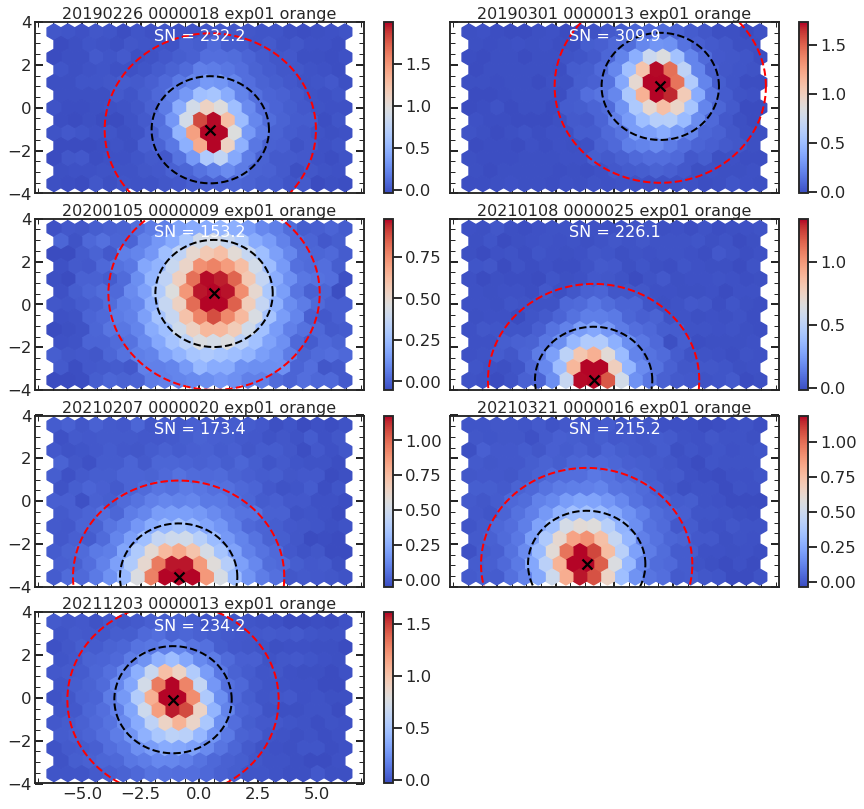

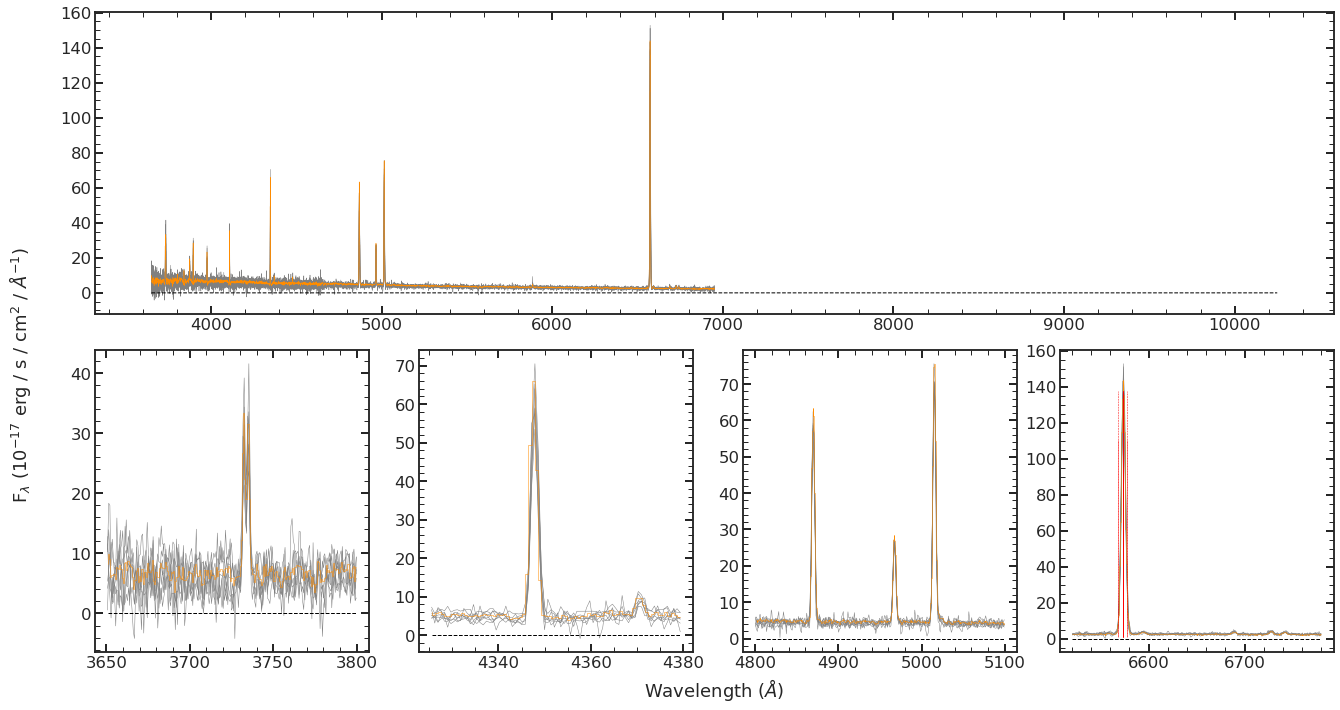

In [19]:
folders = ['/work/03946/hetdex/maverick/LRS2/UT18-3-004/',
           '/work/03946/hetdex/maverick/LRS2/UT19-1-011/',
           '/work/03946/hetdex/maverick/LRS2/UT19-2-001/',
           '/work/03946/hetdex/maverick/LRS2/UT19-2-017/',
           '/work/03946/hetdex/maverick/LRS2/UT19-3-013/',
           '/work/03946/hetdex/maverick/LRS2/UT19-3-014/',
           '/work/03946/hetdex/maverick/LRS2/UT20-1-001/',
           '/work/03946/hetdex/maverick/LRS2/UT20-1-002/',
           '/work/03946/hetdex/maverick/LRS2/UT20-3-002/',
           '/work/03946/hetdex/maverick/LRS2/UT20-3-004/',
           '/work/03946/hetdex/maverick/LRS2/UT21-1-001/',
           '/work/03946/hetdex/maverick/LRS2/UT21-2-005/',
           '/work/03946/hetdex/maverick/LRS2/UT21-3-011/',
           '/work/03946/hetdex/maverick/LRS2/UT22-1-002/']


#############################################################
# CHANGE ME FOR WHAT YOU NEED

exclude_folder = ['multi_20190126_0000020_exp01', 'multi_20190126_0000020_exp02']
objectname1 = 'AGC198691'
detwave = 6573.
redshift = detwave / 6562.8
wave_window= 10.
extraction_radius = 2.5
sky_radius = 4.5
object_radius = 3.0
red_detect_channel = 'red'
blue_detect_channel = 'orange'
func = np.nanmean
#############################################################

lines = [2796., 2803., 3726.1, 3729.1, 3889., 4101.76, 4340.5,
         4363.2, 4861.3, 4958.9, 5006.8, 6562.8, 6716.5, 6730.8, 
         6548., 6583.4]

objectname = objectname1

filenames, names = get_scifiles_from_folder(folders, object_name=objectname, exclude_folder=exclude_folder)
if len(filenames) == 0:
    print('No files found for %s' % objectname)
    sys.exit('Trying to exit gracefully')




telcor_fits = fits.open('lrs2_avg_telluric.fits')
telcor = telcor_fits[0].data[2]

new_response = fits.open('response_correction.fits')
response = new_response[0].data[1]

wsel = ((def_wave>9000) * (def_wave<10050)) + (def_wave<3800) + (def_wave>10200)
response = np.interp(def_wave, def_wave[~wsel], response[~wsel])


LRS2 = LRS2Object(filenames, detwave=detwave, wave_window=wave_window,
                  red_detect_channel=red_detect_channel,
                  blue_detect_channel=blue_detect_channel,
                  ignore_mask=False)

#LRS2.set_pca_wave_mask(lines, redshift, window=8.)
LRS2.subtract_sky(func=np.nansum, local=True, pca=True, correct_ftf_from_skylines=False,
                  sky_radius=sky_radius, obj_radius=object_radius,
                  ncomp=25, bins=25, peakthresh=2., pca_iter=3)

LRS2.get_astrometry()
LRS2.extract_spectrum(radius=extraction_radius)
LRS2.smooth_resolution(redkernel=1.8, bluekernel=0.1)
LRS2.rectify(def_wave)
LRS2.normalize(detwave=detwave, wave_window=wave_window, func=func)
LRS2.calculate_sn()
LRS2.combine_spectra()
LRS2.spec1D =  LRS2.spec1D * response
LRS2.write_combined_spectrum(telcor=telcor)
LRS2.setup_plotting()
for key in LRS2.sides.keys():
    for L in LRS2.sides[key]:
        if (L.channel == blue_detect_channel) or (L.channel == red_detect_channel):
            L.plot_image(radius=extraction_radius, func=func, attr='skysub', quick_skysub=False,
                         sky_radius=sky_radius, wave_window=wave_window)

LRS2.fig.savefig('%s_image_plot.png' % objectname, dpi=150)

#LRS2.make_cube(def_wave, ran=[-6., 6., -6., 9.])
#LRS2.combine_cubes()
#LRS2.spec3D =  LRS2.spec3D * response
#LRS2.spec3D =  LRS2.spec3D / telcor
#LRS2.write_cube(outname=(objectname + '_combined_cube.fits'))

wran = [[3650, 10250], [3650, 3800], [4325, 4380], [4800, 5100], [6520, 6780]]

fig, ax = plt.subplots(5, 1, figsize=(20, 10))
ax[0].set_position([0.1, 0.55, 0.86, 0.42])
ax[1].set_position([0.1, 0.08, 0.19, 0.42])
ax[2].set_position([0.325, 0.08, 0.19, 0.42])
ax[3].set_position([0.55, 0.08, 0.19, 0.42])
ax[4].set_position([0.77, 0.08, 0.19, 0.42])

for i, wr in enumerate(wran):
    wave = LRS2.spec1D.spectral_axis.value
    flux =  LRS2.spec1D.flux.value
    error = LRS2.spec1D.uncertainty.array
    wsel = (wave > wr[0]) * (wave < wr[1])
    ax[i].step(wave[wsel], flux[wsel]/1e-17/telcor[wsel], color='darkorange', lw=0.5, alpha=1.0, zorder=2)
    #ax[i].plot(wave[wsel], standard[wsel]/1e-17, color='k', lw=0.5, zorder=3)
    ax[i].plot(wave[wsel], wave[wsel]*0., 'k--', lw=1, zorder=2)
    for key in LRS2.sides.keys():
        for L in LRS2.sides[key]:
            wsel = (L.spec1D.spectral_axis.value > wr[0]) * (L.spec1D.spectral_axis.value < wr[1])
            ax[i].plot(L.spec1D.spectral_axis.value[wsel], L.spec1D.flux.value[wsel]/1e-17, color='grey', lw=0.5, zorder=1)
    if (detwave > wr[0]) * (detwave < wr[1]):
        li = np.nanpercentile(L.spec1D.flux.value[wsel]/1e-17, 0.1)
        hi = np.nanpercentile(L.spec1D.flux.value[wsel]/1e-17, 99.9)
        plt.plot([detwave, detwave], [li, hi], 'r-', lw=1)
        plt.plot([detwave+wave_window/2., detwave+wave_window/2.], [li, hi], 'r--', lw=0.5)
        plt.plot([detwave-wave_window/2., detwave-wave_window/2.], [li, hi], 'r--', lw=0.5)
    f_ax10 = ax[i]
    f_ax10.tick_params(axis='both', which='both', direction='in')
    f_ax10.tick_params(axis='y', which='both', left=True, right=True)
    f_ax10.tick_params(axis='x', which='both', bottom=True, top=True)
    f_ax10.tick_params(axis='both', which='major', length=8, width=2)
    f_ax10.tick_params(axis='both', which='minor', length=5, width=1)
    f_ax10.minorticks_on()

ax[0].set_ylabel(r'F$_{\lambda}$ (10$^{-17}$ erg / s / cm$^2$ / $\AA^{-1}$)')
ax[0].yaxis.set_label_coords(-0.05, -0.2)
ax[0].set_xlabel(r'Wavelength ($\AA$)')
ax[0].xaxis.set_label_coords(0.5, -1.2)
plt.savefig('%s_spectrum_plot.png' % objectname, dpi=150)